# **LAB 5 - PART 1 Classification model (NN,CNN,LSTM) with Time Series Data**

In [145]:
import

### **Data Preparation**

**Load csv from txt files**

**- Load Acceleration**

In [2]:
# Get filename of Acceleration

### START CODE HERE ###
fnames = glob.glob("\*_acceleration.txt")

# Read CSV files

for f in tqdm(fnames_mini):
  tester = pd.read_csv(,names=['timedelta', 'accX', 'accY', 'accZ'])
  testers.append(tester)

ACC = pd.concat(testers)

### END CODE HERE ###

In [3]:
ACC

**- Load Heart Rate**

In [4]:
# Get filename of Heart Rate

### START CODE HERE ###
fnames = glob.glob("\*_heartrate.txt")


HeartR = pd.concat(testers)

### END CODE HERE ###

In [5]:
HeartR

**- Load Labeled Sleep**

In [6]:
# Get filename of Heart Rate

### START CODE HERE ###
fnames = glob.glob("\*_labeled_sleep.txt")


SleepL = pd.concat(testers)

### END CODE HERE ###

**- If some Sleep levels are negative (-1) -> SleepL += 1**

In [7]:
SleepL

**Synchronizes 'ACC', 'HeartR', 'SleepL'** by aligning their time ranges, <br>
and then filters each dataset to only include data within the overlapping time range.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

<br> ACC start: -124489.16105       ACC end: 37458.8583889
<br> HeartR start: -604720.29398    HeartR end: 37541.70998 
<br> SleepL start: 0                SleepL end: 29400 


In [8]:
### START CODE HERE ###

#Find max, min timedelta to find intersection time 
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()

HeartR_max_date = None 
HeartR_min_date = None

SleepL_max_date = None
SleepL_min_data = None

# Obtain data for ACC, HeartR, and SleepL exclusively during the intersection period.

ACC = None
HeartR = None
SleepL = None
### END CODE HERE ###

If your code is correct, this cell will execute without any issues.

In [9]:
print(ACC.shape)
print(HeartR.shape)
print(SleepL.shape)
assert ACC.shape == (4863482, 4)
assert HeartR.shape == (28655, 2)
assert SleepL.shape == (2967, 2)

Converts the `'timedelta'` column of the `ACC` DataFrame to a `pandas Timedelta object` in seconds and rounds it to the nearest second.

In [10]:
### START CODE HERE ###
timedelta_unit = 's'  # Define the timedelta_unit variable
resample_rule = '1s'
ACC['timedelta'] = pd.DataFrame(pd.to_timedelta().round())
### END CODE HERE ###
ACC

Groups the `ACC` DataFrame by `'timedelta'`, calculates the mean of `'accX', 'accY', and 'accZ'` for each group, and then concatenates these averages into a new DataFrame.

In [11]:
### START CODE HERE ###
df_acc = ACC.groupby('timedelta').mean().reset_index()
ACC = df_acc
### END CODE HERE ###
ACC

Converts the `'timedelta'` column of the `HeartR` DataFrame to a `pandas Timedelta object` in seconds, rounds it to the nearest second, sets it as the index, resamples the DataFrame to 1-second intervals using median as the aggregation function, and forward fills any missing values.

In [13]:
### START CODE HERE ###
HeartR['timedelta'] = pd.DataFrame(pd.to_timedelta().round())
HeartR = HeartR.set_index('timedelta').resample().median().ffill()
### END CODE HERE ###
HeartR

Converts the `'timedelta'` column of the `SleepL` DataFrame to a `pandas Timedelta object` in seconds, rounds it to the nearest second, sets it as the index, resamples the DataFrame to 1-second intervals using median as the aggregation function, and forward fills any missing values.

In [14]:
### START CODE HERE ###
SleepL['timedelta'] = pd.DataFrame(pd.to_timedelta().round())
resample_rule = '1s'
SleepL = None
### END CODE HERE ###
SleepL


Merges the `ACC, HeartR, and SleepL` DataFrames into a single DataFrame df, aligning them based on their `'timedelta'` columns using an asof merge.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
	      timedelta	   accX	      accY	       accZ	  heartrate	sleep
0	0 days 00:00:00	-0.143596	0.434711	-0.558406	NaN	NaN
1	0 days 00:00:01	-0.184721	0.438487	-0.492099	NaN	NaN
2	0 days 00:00:02	-0.213871	0.403676	-0.476563	65.0	NaN
3	0 days 00:00:03	-0.176616	0.391760	-0.571252	65.0	NaN
4	0 days 00:00:04	0.072789	0.338097	-0.571049	65.0	NaN

```

In [16]:
## START CODE HERE ###
df = pd.merge_asof(ACC, HeartR, on='timedelta')
df = pd.merge_asof(df, SleepL, on = 'timedelta')
### END CODE HERE ###
df

Fills missing values in the `'heartrate'` column with the column's median,<br> 
Fills missing values in the `'sleep'` column with 0,<br> 
and then drops the `'timedelta'` column from the df DataFrame.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
	   accX	      accY	      accZ	heartrate	sleep
0	-0.143596	0.434711	-0.558406	62.0	0.0
1	-0.184721	0.438487	-0.492099	62.0	0.0
2	-0.213871	0.403676	-0.476563	65.0	0.0
3	-0.176616	0.391760	-0.571252	65.0	0.0
4	0.072789	0.338097	-0.571049	65.0	0.0
```

In [17]:
### START CODE HERE ###
df.fillna()
df.drop()
### END CODE HERE ###
df

1. Separate X input[['accX', 'accY', 'accZ', 'heartrate'] ]and Y output[['sleep']]
2. Perform data scaling using Standardize,<br>
3. Perform SMA: Simple Moving Average to reduce noise in signals ,<br>

In [18]:
### START CODE HERE ###
feature_columns = None
label_columns = None

df_feature = df[feature_columns]
df_label = df[label_columns]

StandardScaler()
fit_transform()

df_feature_SMA = pd.DataFrame()
wsize = 10
minp = 1
df_feature_SMA['accX'] = df_feature['accX'].rolling(wsize, min_periods=minp).mean()
df_feature_SMA['accY'] = None
df_feature_SMA['accZ'] = None
df_feature_SMA['heartrate'] = None
### END CODE HERE ###

Graph of all signals before and after Standardize and SMA
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

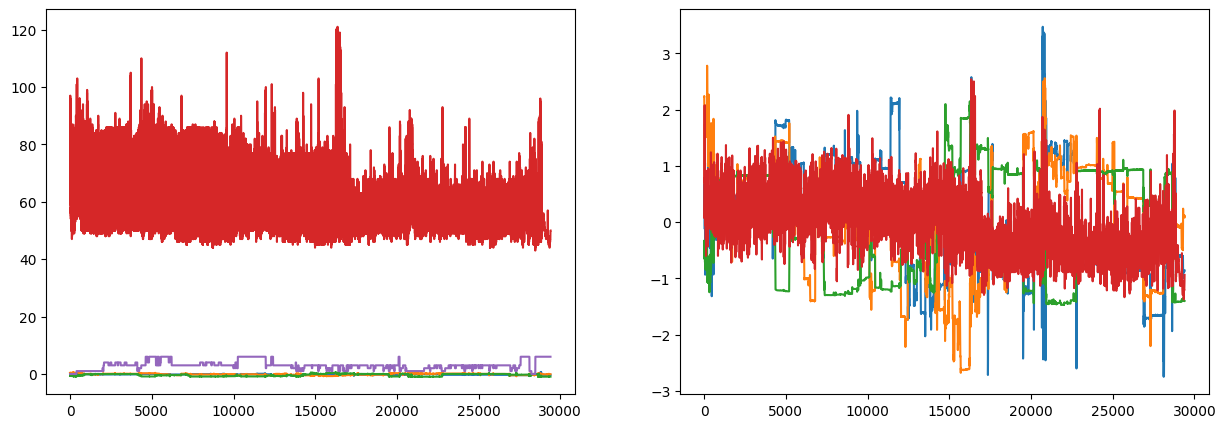

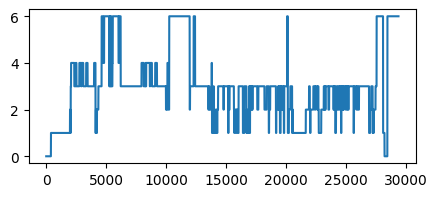

In [19]:
### START CODE HERE ###
# Before Standardize and SMA
plt.plot(df)                
# After
plt.plot(df_feature_SMA)
plt.show()
### END CODE HERE ###

In [20]:
# Graph Sleep labels
plt.plot(df_label)

### **Model Experimentaion**

**Train Test Data Preparation**

In [164]:
X = df_feature_SMA
y = df_label

In [165]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.5,  test_size = 0.3, random_state)

##### **Neural Network**
**Create MLP (NN) Model Architecture**

In [21]:
hiddenL = ( , , )
act = 'relu'
EP = None
lr = None
optimizer = 'adam'
SEED_init = None
tolr = None
mlp = MLPClassifier(hidden_layer_sizes,activation ,max_iter, alpha,solver, random_state,tol=tolr)
mlp

**Traning MLP (NN) Model**

In [22]:
mlp.fit()

**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```----- Classification Report of MLP NN predict X_test -----
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       192
           1       0.86      0.73      0.79      1246
           2       0.77      0.35      0.48      1224
           3       0.84      0.82      0.83      4153
           4       0.64      0.75      0.69       603
           5       0.88      0.88      0.88      1403

   micro avg       0.83      0.74      0.78      8821
   macro avg       0.80      0.71      0.74      8821
weighted avg       0.82      0.74      0.77      8821
 samples avg       0.73      0.74      0.73      8821
```
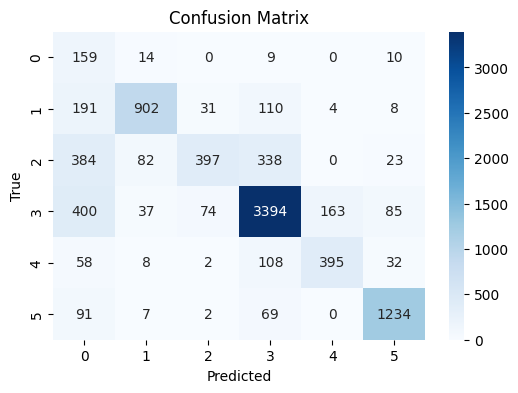

**MLP (NN) Model Prediction**

In [23]:
mlp.predict()

**MLP (NN) Model Performance (Confusion Matrix, Classification_report)**


In [24]:
print('----- Classification Report of MLP NN predict X_test -----')
print(classification_report())
print('----- Confusion matrix of MLP NN predict X_test -----')
confusion_matrix()

##### **Train-Test Data Preparation for CNN Training**
1. Non-Transpose Data (XR Shape1: sliding window size, n_feature)
2. Transpose Data  (XT Shape2: n_feature, sliding window size)

**Non-Transpose data (XR)**



In [212]:
slidingW = 100
stride_step = 10
n_feature = 4 # accX, accY, accZ, 

X = df_feature_SMA

XR = []
y = []
for i in range(0, len(X)-slidingW, stride_step):
    # sliding window X[i: i+slidingW]
    feature = np.array()        
    # Reshape 2D Array to 3D Array with channel last
    featureR = feature.reshape(slidingW, n_feature, 1)  
    # sliding window df_labels[i: i+slidingW]
    label = np.array()         
    # Majority vote : mode of labels for whole array 
    mode_values, countL = stats.mode(label,axis=None) 
    label = mode_values
    
    XR.append(featureR)
    y.append(label)

XR = np.array(XR)
yR = pd.DataFrame(np.array(y).ravel(),columns=['Sleep_Label'])
# one hot encoding yR
y = pd.get_dummies()
yR = y

In [ ]:
XR

In [ ]:
yR

**Non-Transpose Tran_test_split data**

In [172]:
#----- CNN with XR -----------
#--- Train - Validate - Test ----
XR_train, XR_test, yR_train, yR_test = train_test_split(XR, yR, test_size=0.3,random_state)

##### **CNN Architecture (XR)**

In [25]:
CNN_L1 = 16
CNN_L2 = 64
CNN_L3 = 128
Ker_size = (3,3)
Act_func = "relu"
Dense_size = 512
Nclass = yR.shape

pDrop = 0.4

Input_shape = (slidingW, n_feature, 1)
P_size = (2,1)

model = Sequential()
model.add(Conv2D(padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(pDrop))

model.add(Conv2D())
model.add(MaxPooling2D( ))
model.add(Dropout(pDrop))

model.add(Conv2D( ))
model.add(MaxPooling2D( ))
model.add(Dropout(pDrop))

model.add(Flatten())
model.add(Dense() ))
model.add(Dense(Nclass, activation='sigmoid'))

adam = optimizers.Adam(learning_rate)
model.compile(optimizer=adam, loss= tf.keras.losses.categorical_crossentropy,
              metrics=["acc"])
model.summary()

##### **Train CNN(XR)**

In [26]:
historyXR = model.fit()

##### **CNN (XR) Performance**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

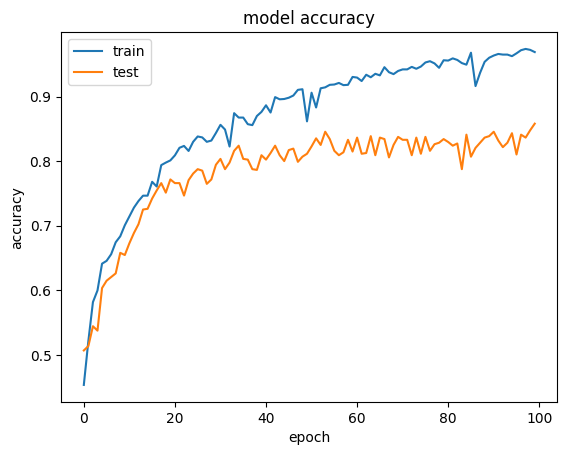
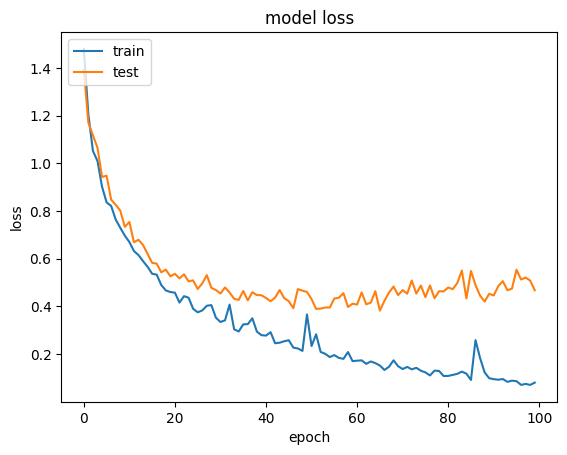

In [27]:
# summarize history for accuracy
history = historyXR
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [28]:
# summarize history for loss
history=historyXR
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

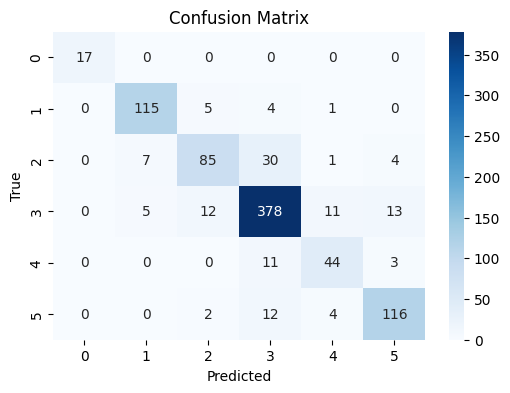

```
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.92      0.91       125
           2       0.82      0.67      0.74       127
           3       0.87      0.90      0.89       419
           4       0.72      0.76      0.74        58
           5       0.85      0.87      0.86       134

    accuracy                           0.86       880
   macro avg       0.86      0.85      0.86       880
weighted avg       0.86      0.86      0.86       880
```

In [29]:
print('----- Classification Report of CNN predict X_test -----')
CNN_pred = model.predict(XR_test)

print(classification_report())
print('----- Confusion matrix of CNN predict X_test -----')
print(confusion_matrix())

cm = confusion_matrix()

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

### **Transpose data (XT)**

In [177]:
slidingW = 100
stride_step = 10
n_feature = 4 # accX, accY, accZ, HeartH

X = df_feature_SMA

XT = []
y = []
for i in range(0, len(X)-slidingW, stride_step):
    # X sliding windows X[i: i+]
    feature = np.array(X)
    # feature transpose
    featureT = np.transpose()
    # reshape to 3D with channel las=1
    featureT = featureT.reshape(n_feature, slidingW, 1)
    # label sliding windows = df_label[i:i+slidingW]
    label = np.array()
    # Majority vote labels using mode() #whole array
    mode_values, countL = None
    label = mode_values
    
    XT.append(featureT)
    y.append(label)

XT = np.array(XT)
yT = pd.DataFrame(np.array(y).ravel(),columns=['Sleep_Label'])
# one hot encoding yT
y = pd.get_dummies()
yT = y

In [30]:
XT
yT

##### **Train Test Split (XT)**

In [188]:
#----- CNN with XT -----------
#--- Train - Validate - Test ----
XT_train, XT_test, yT_train, yT_test = train_test_split(XT, yT, test_size=0.3,random_state)

##### **CNN Architecture (XT)**

In [32]:
CNN_L1 = 16
CNN_L2 = 64
CNN_L3 = 128
Ker_size = (3,3)
Act_func = "relu"
Dense_size = 512
Nclass = yT.shape
print(Nclass)

Input_shape = (n_feature, slidingW, 1)
P_size = (1,2)

model = Sequential()

#Conv layer#1
model.add(Conv2D())
model.add(MaxPooling2D())
model.add(Dropout())

#Conv layer#2
model.add()
model.add()
model.add()

#Conv layer#2
model.add()

# Flatten: Convert to 1D vector
model.add(Flatten())

# Dense (NN) Layer#3
model.add(Dense( ))

# Dense (NN) Layers#4
model.add(Dense(Nclass, activation='sigmoid'))

adam = optimizers.Adam(learning_rate)
model.compile(optimizer=adam, loss= tf.keras.losses.categorical_crossentropy, metrics)
model.summary()

##### **Train CNN (XT)**

In [33]:
historyXT = model.fit()

##### **CNN Performance (XT)**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

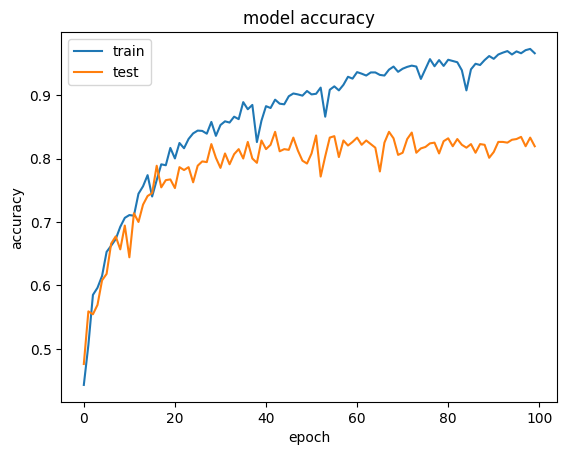
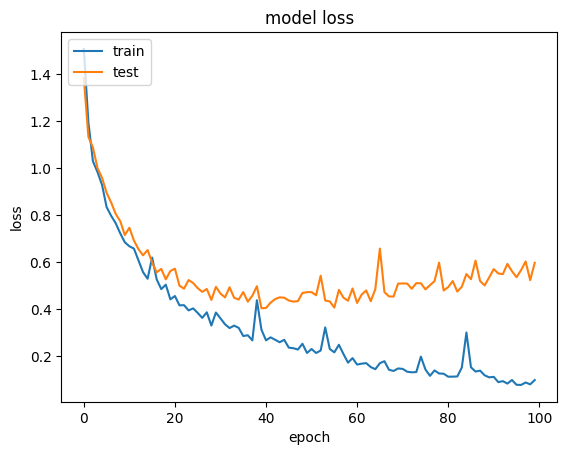

In [35]:
# summarize history for accuracy
history = historyXT
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [36]:
summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

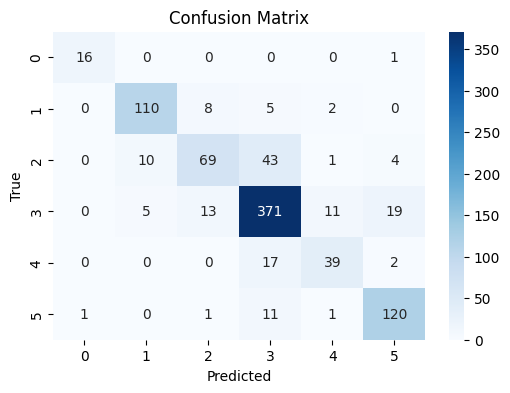

```
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.88      0.88      0.88       125
           2       0.76      0.54      0.63       127
           3       0.83      0.89      0.86       419
           4       0.72      0.67      0.70        58
           5       0.82      0.90      0.86       134

    accuracy                           0.82       880
   macro avg       0.83      0.80      0.81       880
weighted avg       0.82      0.82      0.82       880
```

In [37]:
CNN_pred = model.predict()

print('----- Classification Report of CNN predict X_test -----')
print(classification_report())
print('----- Confusion matrix of CNN predict X_test -----')
print(confusion_matrix())

cm = confusion_matrix()
plt.figure(figsize=(6, 4))
sns.heatmap(cm)

### **Long Short Term Memory (LSTM)**

**Train-Test Data Preparation**
LSTM Use data XR, XT same as CNN

##### **Prepare (XR) Data**

In [237]:
slidingW = 100
stride_step = 10
n_feature = 4 # accX, accY, accZ, 

X = df_feature_SMA

XR = []
y = []
for i in range(0, len(X)-slidingW, stride_step):
    # sliding window X[i: i+slidingW]
    feature = np.array()        
    # Reshape 2D Array to 3D Array with channel last
    featureR = feature.reshape(slidingW, n_feature, 1)  
    # sliding window df_labels[i: i+slidingW]
    label = np.array()         
    # Majority vote : mode of labels for whole array 
    mode_values, countL = stats.mode(label,axis=None) 
    label = mode_values
    
    XR.append(featureR)
    y.append(label)

XR = np.array(XR)
yR = pd.DataFrame(np.array(y).ravel(),columns=['Sleep_Label'])
# one hot encoding yR
y = pd.get_dummies()
yR = y

In [239]:
XR_train, XR_test, yR_train, yR_test = train_test_split()

##### **LSTM (XR) Model Architecture**

In [38]:
#LSTM 2 Layers
#Nodes = [50, 100, 150, 200, 250, 300, 400, 500, 1000]
n_hidden1 = None
n_hidden2 = None

Nclass = yR.shape
Input_shape = (slidingW, n_feature)

model = Sequential()
model.add(LSTM(n_hidden1, return_sequences=True, input_shape=Input_shape))
model.add(Dropout())

model.add(LSTM(n_hidden2))
model.add(Dropout())
model.add(Dense(Nclass, activation='softmax'))
model.summary()

**Training Parameters (optimizer)**

In [242]:
# Compiling the model
#adam = optimizers.Adam(learning_rate=0.001)
adam = 'adam'
model.compile()

##### **Training LSTM (XR) Model**

In [40]:
# Training the model
EP = None
batch_size = None

historyL_XR = model.fit()

 **LSTM (XR) Model Performance**

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

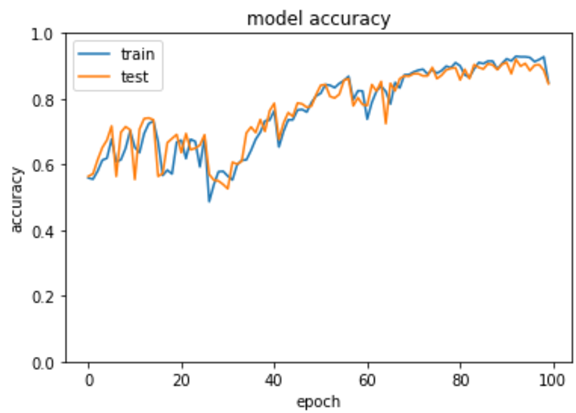

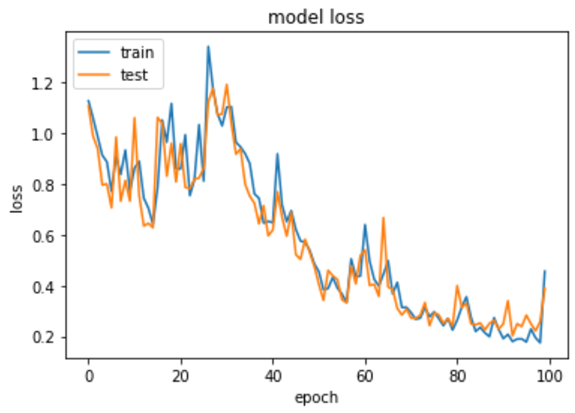

In [41]:
# summarize history for accuracy
history = historyL_XR
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])


In [42]:
# summarize history for loss
history = historyL_XR
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

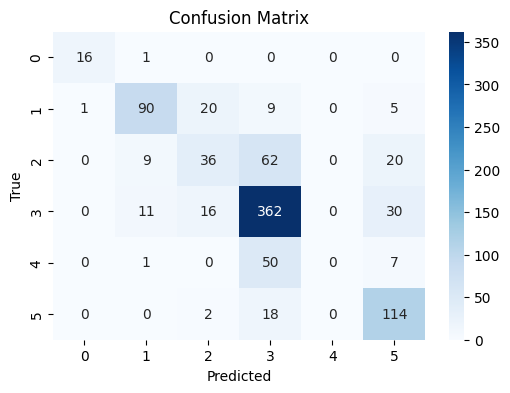

```
             precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.80      0.72      0.76       125
           2       0.49      0.28      0.36       127
           3       0.72      0.86      0.79       419
           4       0.00      0.00      0.00        58
           5       0.65      0.85      0.74       134

    accuracy                           0.70       880
   macro avg       0.60      0.61      0.60       880
weighted avg       0.65      0.70      0.66       880

```

In [43]:
LSTM_pred = model.predict(XR_test)

print('----- Classification Report of CNN predict X_test -----')
print(classification_report())
print('----- Confusion matrix of CNN predict X_test -----')
print(confusion_matrix())

cm = confusion_matrix()
plt.figure(figsize=(6, 4))
sns.heatmap(cm)

##### **Prepare (XT) Data**

In [ ]:
slidingW = 100
stride_step = 10
n_feature = 4 # accX, accY, accZ, HeartH

X = df_feature_SMA

XT = []
y = []
for i in range(0, len(X)-slidingW, stride_step):
    # X sliding windows X[i: i+]
    feature = np.array(X)
    # feature transpose
    featureT = np.transpose()
    # reshape to 3D with channel las=1
    featureT = featureT.reshape(n_feature, slidingW, 1)
    # label sliding windows = df_label[i:i+slidingW]
    label = np.array()
    # Majority vote labels using mode() #whole array
    mode_values, countL = None
    label = mode_values
    
    XT.append(featureT)
    y.append(label)

XT = np.array(XT)
yT = pd.DataFrame(np.array(y).ravel(),columns=['Sleep_Label'])
# one hot encoding yT
y = pd.get_dummies()
yT = y

In [ ]:
#----- LSTM with XT -----------
#--- Train - Validate - Test ----
XT_train, XT_test, yT_train, yT_test = train_test_split()

##### **Create LSTM (XT) Model Architecture**

In [ ]:
#LSTM 2 Layers
#Nodes = [50, 100, 150, 200, 250, 300, 400, 500, 1000]
n_hidden1 = None
n_hidden2 = None
pv1 = None
pv2 = None

Nclass = yT.shape
Input_shape = (n_feature, slidingW)
print(Input_shape)

model = Sequential()
model.add(LSTM(n_hidden1, return_sequences=True, input_shape=Input_shape))
model.add(Dropout(pv1))

model.add(LSTM(n_hidden2))
model.add(Dropout(pv2))
model.add(Dense(Nclass, activation='softmax'))
model.summary()

**Training Parameters (optimizer)**

In [ ]:

adam = optimizers.Adam()
model.compile()

In [ ]:
# Training the model
EP = None
batch_size = None

historyL_XR = model.fit()

In [ ]:
# summarize history for accuracy
history = historyL_XR
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
# summarize history for loss
history = historyL_XR
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [ ]:
LSTM_pred = model.predict(XR_test)

print('----- Classification Report of CNN predict X_test -----')
print(classification_report())
print('----- Confusion matrix of CNN predict X_test -----')
print(confusion_matrix())

cm = confusion_matrix()
plt.figure(figsize=(6, 4))
sns.heatmap(cm)